# 1. Creating Model

In [1]:
from keras import layers
from keras.models import Sequential

In [3]:
model = Sequential()

model.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))


model.add(layers.Flatten())


model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)     

# 2. Compiling Model

In [10]:
from tensorflow.keras import optimizers

model.compile(loss = "binary_crossentropy",
              optimizer = optimizers.RMSprop(learning_rate = 1e-4),
              metrics = ["acc"])

# 3. Data Generation

In [13]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
train_directory = "datasets/catdog/train"
validation_directory = "datasets/catdog/validation"

In [15]:
train_generator = train_datagen.flow_from_directory(train_directory,
                                                    target_size = (150,150),
                                                    batch_size = 20,
                                                    class_mode = "binary")

validation_generator = train_datagen.flow_from_directory(validation_directory,
                                                         target_size = (150,150),
                                                         batch_size = 20,
                                                         class_mode = "binary")

Found 1999 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# 4. Training

In [16]:
history = model.fit_generator(train_generator,
                              epochs = 20,
                              validation_data = validation_generator,
                              validation_steps = 50)

<ipython-input-16-c344b01f4fc1>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/20
100/100 [==============================] - 37s 360ms/step - loss: 0.6937 - acc: 0.5303 - val_loss: 0.6886 - val_acc: 0.5230
Epoch 2/20
100/100 [==============================] - 36s 356ms/step - loss: 0.6605 - acc: 0.6083 - val_loss: 0.6487 - val_acc: 0.6260
Epoch 3/20
100/100 [==============================] - 35s 354ms/step - loss: 0.6179 - acc: 0.6548 - val_loss: 0.6219 - val_acc: 0.6520
Epoch 4/20
100/100 [==============================] - 36s 358ms/step - loss: 0.5826 - acc: 0.7004 - val_loss: 0.5899 - val_acc: 0.6850
Epoch 5/20
100/100 [==============================] - 37s 367ms/step - loss: 0.5376 - acc: 0.7374 - val_loss: 0.5790 - val_acc: 0.6870
Epoch 6/20
100/100 [==============================] - 38s 377ms/step - loss: 0.5136 - acc: 0.7454 - val_loss: 0.5761 - val_acc: 0.6960
Epoch 7/20
100/100 [==============================] - 37s 365ms/step - loss: 0.4723 - acc: 0.7724 - val_loss: 0.5957 - val_acc: 0.6950
Epoch 8/20
100/100 [==============================] - 3

# 5. Visualization

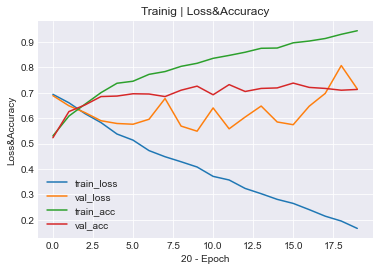

In [18]:
import matplotlib.pyplot as plt
import numpy as np


plt.style.use("seaborn-darkgrid")
plt.figure()

epochs = 20

plt.plot(np.arange(0,epochs), history.history["loss"], label="train_loss")
plt.plot(np.arange(0,epochs), history.history["val_loss"], label="val_loss")

plt.plot(np.arange(0,epochs), history.history["acc"], label="train_acc")
plt.plot(np.arange(0,epochs), history.history["val_acc"], label="val_acc")

plt.title("Trainig | Loss&Accuracy")

plt.xlabel("20 - Epoch")
plt.ylabel("Loss&Accuracy")

plt.legend(loc="lower left")

In [31]:
model.save("models/cat_dog_first.h5")

Problem: Overfitting

1. New Model
2. Data Augmentation

# Creating New Model

In [19]:
model_x = Sequential()

model_x.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape = (150,150,3)))
model_x.add(layers.MaxPooling2D((2,2)))

model_x.add(layers.Conv2D(64, (3,3), activation = "relu"))
model_x.add(layers.MaxPooling2D((2,2)))

model_x.add(layers.Conv2D(128, (3,3), activation = "relu"))
model_x.add(layers.MaxPooling2D((2,2)))

model_x.add(layers.Conv2D(128, (3,3), activation = "relu"))
model_x.add(layers.MaxPooling2D((2,2)))


model_x.add(layers.Flatten())
model_x.add(layers.Dropout(0.4))

model_x.add(layers.Dense(512, activation = "relu"))
model_x.add(layers.Dense(1, activation = "sigmoid"))

model_x.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [20]:
model_x.compile(loss = "binary_crossentropy",
                optimizer = optimizers.RMSprop(learning_rate = 1e-4),
                metrics = ["acc"])

# Image Data Augmentation

In [24]:
train_datagen_x = ImageDataGenerator(rescale = 1./255,
                                     rotation_range = 45,
                                     width_shift_range = 0.3,
                                     height_shift_range = 0.3,
                                     shear_range = 0.3,
                                     zoom_range = 0.3,
                                     horizontal_flip = True,
                                     vertical_flip = True,
                                     fill_mode = "nearest")

validation_datagen_x = ImageDataGenerator(rescale = 1./255)

In [25]:
train_generator_x = train_datagen_x.flow_from_directory(train_directory,
                                                        target_size = (150,150),
                                                        batch_size = 16,
                                                        class_mode = "binary")


validation_generator_x = validation_datagen_x.flow_from_directory(train_directory,
                                                                  target_size = (150,150),
                                                                  batch_size = 16,
                                                                  class_mode = "binary")

Found 1999 images belonging to 2 classes.
Found 1999 images belonging to 2 classes.


# Training New Model

In [27]:
history_x = model_x.fit_generator(train_generator_x,
                                  steps_per_epoch = 100,
                                  epochs = 100,
                                  validation_data = validation_generator_x,
                                  validation_steps = 50)

print("Info: Done!")

<ipython-input-27-72c383605a3e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_x = model_x.fit_generator(train_generator_x,


Epoch 1/100
100/100 [==============================] - 33s 334ms/step - loss: 0.6837 - acc: 0.5519 - val_loss: 0.6735 - val_acc: 0.5700
Epoch 2/100
100/100 [==============================] - 33s 329ms/step - loss: 0.6770 - acc: 0.5629 - val_loss: 0.6575 - val_acc: 0.5788
Epoch 3/100
100/100 [==============================] - 33s 327ms/step - loss: 0.6750 - acc: 0.5713 - val_loss: 0.6599 - val_acc: 0.5813
Epoch 4/100
100/100 [==============================] - 33s 333ms/step - loss: 0.6634 - acc: 0.5704 - val_loss: 0.6478 - val_acc: 0.6050
Epoch 5/100
100/100 [==============================] - 35s 345ms/step - loss: 0.6545 - acc: 0.5766 - val_loss: 0.6583 - val_acc: 0.5788
Epoch 6/100
100/100 [==============================] - 34s 335ms/step - loss: 0.6451 - acc: 0.6223 - val_loss: 0.7379 - val_acc: 0.5138
Epoch 7/100
100/100 [==============================] - 33s 329ms/step - loss: 0.6425 - acc: 0.6185 - val_loss: 0.6312 - val_acc: 0.6288
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 30s 301ms/step - loss: 0.5385 - acc: 0.7292 - val_loss: 0.4755 - val_acc: 0.7663
Epoch 62/100
100/100 [==============================] - 30s 298ms/step - loss: 0.5455 - acc: 0.7223 - val_loss: 0.4590 - val_acc: 0.7763
Epoch 63/100
100/100 [==============================] - 32s 317ms/step - loss: 0.5465 - acc: 0.7292 - val_loss: 0.5109 - val_acc: 0.7625
Epoch 64/100
100/100 [==============================] - 31s 310ms/step - loss: 0.5391 - acc: 0.7317 - val_loss: 0.4482 - val_acc: 0.7937
Epoch 65/100
100/100 [==============================] - 30s 303ms/step - loss: 0.5416 - acc: 0.7323 - val_loss: 0.5287 - val_acc: 0.7200
Epoch 66/100
100/100 [==============================] - 30s 297ms/step - loss: 0.5336 - acc: 0.7325 - val_loss: 0.5644 - val_acc: 0.7200
Epoch 67/100
100/100 [==============================] - 32s 316ms/step - loss: 0.5346 - acc: 0.7342 - val_loss: 0.4808 - val_acc: 0.7650
Epoch 68/100
100/100 [===================

# Visualization New Model

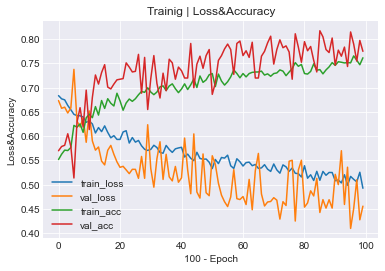

In [28]:
import matplotlib.pyplot as plt
import numpy as np


plt.style.use("seaborn-darkgrid")
plt.figure()

epochs = 100

plt.plot(np.arange(0,epochs), history_x.history["loss"], label="train_loss")
plt.plot(np.arange(0,epochs), history_x.history["val_loss"], label="val_loss")

plt.plot(np.arange(0,epochs), history_x.history["acc"], label="train_acc")
plt.plot(np.arange(0,epochs), history_x.history["val_acc"], label="val_acc")

plt.title("Trainig | Loss&Accuracy")

plt.xlabel("100 - Epoch")
plt.ylabel("Loss&Accuracy")

plt.legend(loc="lower left")

In [29]:
model_x.save("models/cat_dog_last.h5")

# Prediction

In [32]:
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import numpy as np

In [52]:
model_path = "models/cat_dog_last.h5"
image_path = "datasets/catdog/test/cats/1513.jpg"

In [53]:
prediction_model = load_model(model_path)
test_img = load_img(image_path, target_size=(150,150))

<PIL.Image.Image image mode=RGB size=150x150 at 0x216CE54A640>


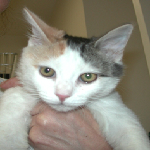

In [54]:
print(test_img)
test_img

In [55]:
test_img = img_to_array(test_img)
test_img.shape


(150, 150, 3)

In [56]:
test_img = np.expand_dims(test_img, axis=0)

In [57]:
test_img.shape

(1, 150, 150, 3)

In [58]:
train_generator_x.class_indices

{'cats': 0, 'dogs': 1}

In [59]:
result = prediction_model.predict(test_img)
result

array([[0.]], dtype=float32)

In [60]:
if result[0][0] > 0.5:
    label = "Dog"
    print("Prediction: This is a",label)
    
else:
    label = "Cat"
    print("Prediction: This is a", label)

Prediction: This is a Cat


In [61]:
import cv2

test_img = cv2.imread(image_path)


font = cv2.FONT_HERSHEY_SIMPLEX
color = (255,255,0)
cv2.putText(test_img, label, (20,40), font, 1.0, color, 3)


cv2.imshow("Prediction", test_img)
cv2.waitKey(0)
cv2.destroyAllWindows()